In [65]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict, concatenate_datasets
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance


import json
import matplotlib.pyplot as plt

In [66]:
# label: true = 0, fake = 1

In [67]:
experiment_name = "mistral_10k"
fake_train_dataset = load_from_disk(f"fake_true_dataset_{experiment_name}")

In [68]:
# save to json
#fake_train_dataset["train"].to_json("fake_true_dataset.json", force_ascii=True)

# load to pandas
df = pd.DataFrame(fake_train_dataset['train'])

# transform text to list by splitting on \n
df["text"] = df["text"].apply(lambda x: x.split("\n"))

# dump to json
df.to_json(f"fake_true_dataset_{experiment_name}.json", force_ascii=False, indent=4)



In [69]:
fake_train_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 13146
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1643
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1643
    })
})

In [54]:
fake_train_dataset['train'][0]

{'text': 'Former Vice President Dick Cheney on Sunday defended the Bush administration\'s economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We\'ve accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN\'s "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla',
 'label': 0}

In [55]:
print(fake_train_dataset['train'][0]['text'])

Former Vice President Dick Cheney on Sunday defended the Bush administration's economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We've accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN's "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla


In [56]:
fake_train_dataset['train'][2]

{'text': 'Former Vice President Dick Cheney on Sunday defended the Bush administration\'s handling of the Iraq war, and said President Barack Obama\'s decision to withdraw U.S. troops from the country by the end of the year was a "grave mistake."  "The notion that we\'re leaving because we\'ve achieved our objectives is just wrong," Cheney said in an interview with ABC\'s "This Week."  "We\'re leaving because of artificial timetables that the president imposed on the commanders in the field, and that\'s a mistak',
 'label': 1}

In [9]:
print(fake_train_dataset['train'][2]["text"])

Space shuttle Discovery launched just before midnight Friday on a mission to the international space station. Space shuttle Discovery lifts off late Friday from Kennedy Space Center in a photo from iReporter Alan Walters. The crew of seven astronauts includes one from Mexico and another from Sweden. One of those seven, Nicole Stott, will remain on the station as a flight engineer, while astronaut Timothy Kopra is to return home aboard the shuttle. Also on board: The Leonardo logistics module, sc


In [11]:
# transform dataset to pandas dataframe
fake_train_df = pd.DataFrame(fake_train_dataset['train'])
fake_train_df.head()

,text,label
0,Former Vice President Dick Cheney on Sunday de...,0
1,Former Vice President Dick Cheney on Sunday de...,1
2,Space shuttle Discovery launched just before m...,0
3,When Eileen Mather lands in Mexico City on her...,0
4,When Eileen Mather lands in Mexico City on her...,1


In [12]:
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)))

Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


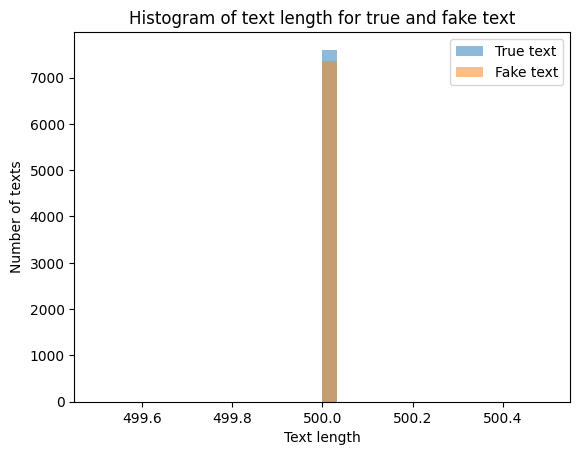

In [13]:
# show histogram of text length for true and fake text
plt.hist(fake_train_df[fake_train_df['label'] == 0]['text'].apply(len), bins=30, alpha=0.5, label='True text')
plt.hist(fake_train_df[fake_train_df['label'] == 1]['text'].apply(len), bins=30, alpha=0.5, label='Fake text')

# add x and y axis labels
plt.xlabel('Text length')
plt.ylabel('Number of texts')

plt.title("Histogram of text length for true and fake text")

plt.legend(loc='upper right')

In [15]:
print("Average number of newlines in text with label 0 (=True text):", np.mean(fake_train_df[fake_train_df['label'] == 0]['text'].apply(lambda x: x.count("\n"))))
print("Average number of newlines in text with label 1 (=Fake text):", np.mean(fake_train_df[fake_train_df['label'] == 1]['text'].apply(lambda x: x.count("\n"))))

Average number of newlines in text with label 0 (=True text): 0.0
Average number of newlines in text with label 1 (=Fake text): 0.0


In [16]:
fake_train_df.describe()

,label
count,14952.000000
mean,0.491640
std,0.499947
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [17]:
fake_train_df[fake_train_df["label"] == 1].describe()

,label
count,7351.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [18]:
fake_train_df.head(20)

,text,label
0,Former Vice President Dick Cheney on Sunday de...,0
1,Former Vice President Dick Cheney on Sunday de...,1
2,Space shuttle Discovery launched just before m...,0
3,When Eileen Mather lands in Mexico City on her...,0
4,When Eileen Mather lands in Mexico City on her...,1
5,Zimbabwean lawmakers on Monday narrowly voted ...,0
6,Zimbabwean lawmakers on Monday narrowly voted ...,1
7,Zimbabwean lawmakers on Monday narrowly voted ...,1
8,Former detainees of Immigration and Customs En...,0
9,A memorial cruise is scheduled to set sail 100...,0


In [19]:
# filter out texts with length greater than 1000
fake_train_df_filtered = fake_train_df[fake_train_df["text"].apply(len) < 1000]
print("Average size of text with label 0 (=True text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 0]['text'].apply(len)))
print("Average size of text with label 1 (=Fake text):", np.mean(fake_train_df_filtered[fake_train_df_filtered['label'] == 1]['text'].apply(len)))


Average size of text with label 0 (=True text): 500.0
Average size of text with label 1 (=Fake text): 500.0


In [20]:
# compute wasserstein distance between true and fake text lengths
true_text_lengths = fake_train_df[fake_train_df['label'] == 0]['text'].apply(len)
fake_text_lengths = fake_train_df[fake_train_df['label'] == 1]['text'].apply(len)

wasserstein_distance(true_text_lengths, fake_text_lengths)


0.0

# Test set

In [62]:
fake_train_dataset["train"][0]

{'text': 'Former Vice President Dick Cheney on Sunday defended the Bush administration\'s economic record, the invasion of Iraq and the treatment of suspected terrorists, warning that reversing its anti-terrorism policies endangers Americans. "We\'ve accomplished nearly everything we set out to do," ex-Vice President Dick Cheney says Sunday about Iraq. In a wide-ranging interview with CNN\'s "State of the Union," Cheney said the harsh interrogations of suspects and the use of warrantless electronic surveilla',
 'label': 0}

In [63]:
fake_test_df = pd.read_json("fake_true_dataset_mistral_10k_test.json")
fake_test_df.head()

,text,label
0,[Relatives of the 89 people killed in Sunday's...,0
1,[Relatives of the 89 people killed in Sunday's...,1
2,[The ninth floor of the Miami-Dade pretrial de...,0
3,[The ninth floor of the Miami-Dade pretrial de...,1
4,[A key rebel commander and fugitive from a U.S...,0


In [64]:
fake_test_df = pd.DataFrame(fake_train_dataset['test'])
fake_test_df.head(10)

,text,label
0,Tropical Storm Claudette was gaining strength ...,1
1,A 75th minute strike by striker Graziano Pelle...,0
2,Authorities in Azerbaijan recently uncovered a...,0
3,As President Obama and Mexican President Felip...,0
4,Five U.S. soldiers were killed Friday in a sui...,0
5,Five U.S. soldiers were killed Friday in a sui...,1
6,Five U.S. soldiers were killed Friday in a sui...,1
7,Suits were swapped for jeans and sneakers thro...,0
8,Suits were swapped for jeans and sneakers thro...,1
9,Manchester United defender Patrice Evra has be...,0


In [27]:
fake_test_df["text"][2]

'Three professors and a former professor at Columbia University\'s Teachers College have filed a lawsuit against the university, claiming that the school has been discriminating against them for years on the basis of their gender and sexual orientation.  The suit, filed on Wednesday in federal court, accuses the university of denying the professors the right to tenure, and claims that the school has fostered a "hostile environment" for the professors.  The suit also claims that the school has disc'

In [29]:
fake_test_df["text"].unique().shape

(1450,)

In [43]:
fake_train_df["text"].unique().shape

(11647,)